## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten,Input
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.shape

(569, 33)

In [7]:
df = df.dropna(axis=1)

In [8]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Exploratory Data Analysis

In [10]:
df.head(20).style.background_gradient(cmap='Blues')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
5,843786,M,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400
6,844359,M,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680
7,84458202,M,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100
8,844981,M,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200
9,84501001,M,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500


In [11]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

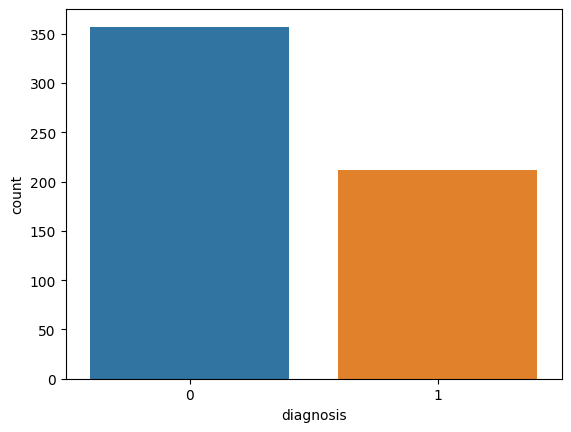

In [14]:
sns.countplot(x='diagnosis', data=df)

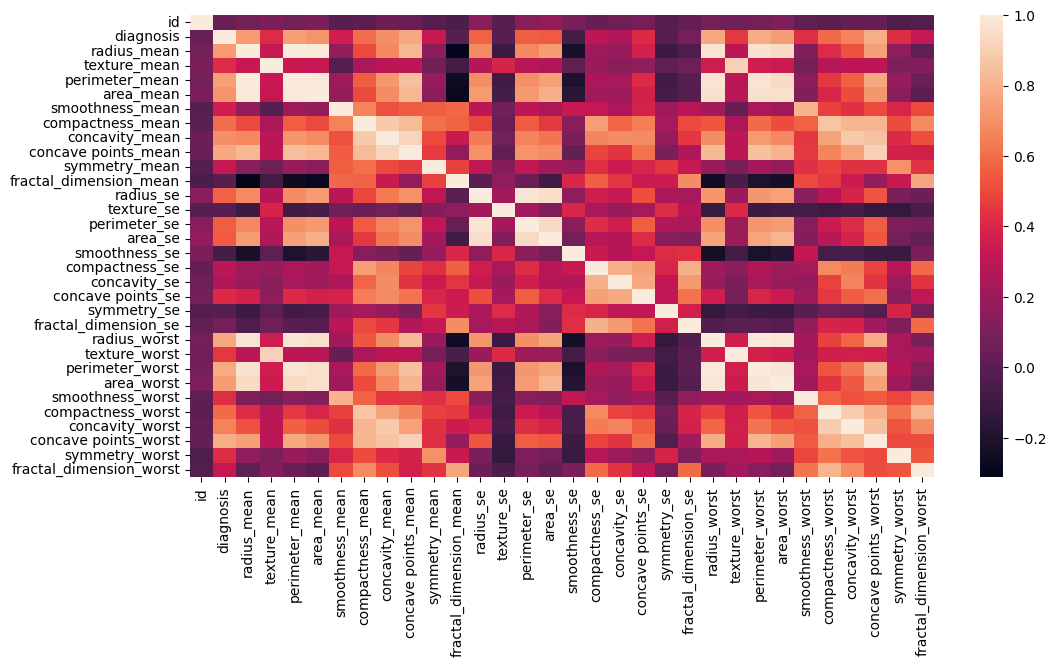

In [15]:
plt.figure(figsize = (12, 6), dpi = 100)
sns.heatmap(df.corr());

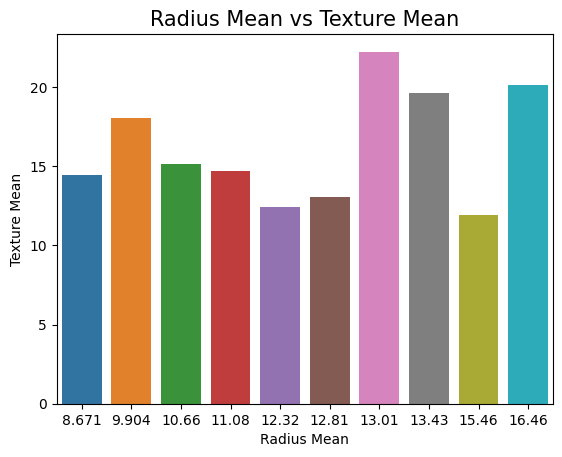

In [16]:
sns.barplot(x="radius_mean", y="texture_mean", data=df[170:180])
plt.title("Radius Mean vs Texture Mean",fontsize=15)
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()
plt.style.use("ggplot")

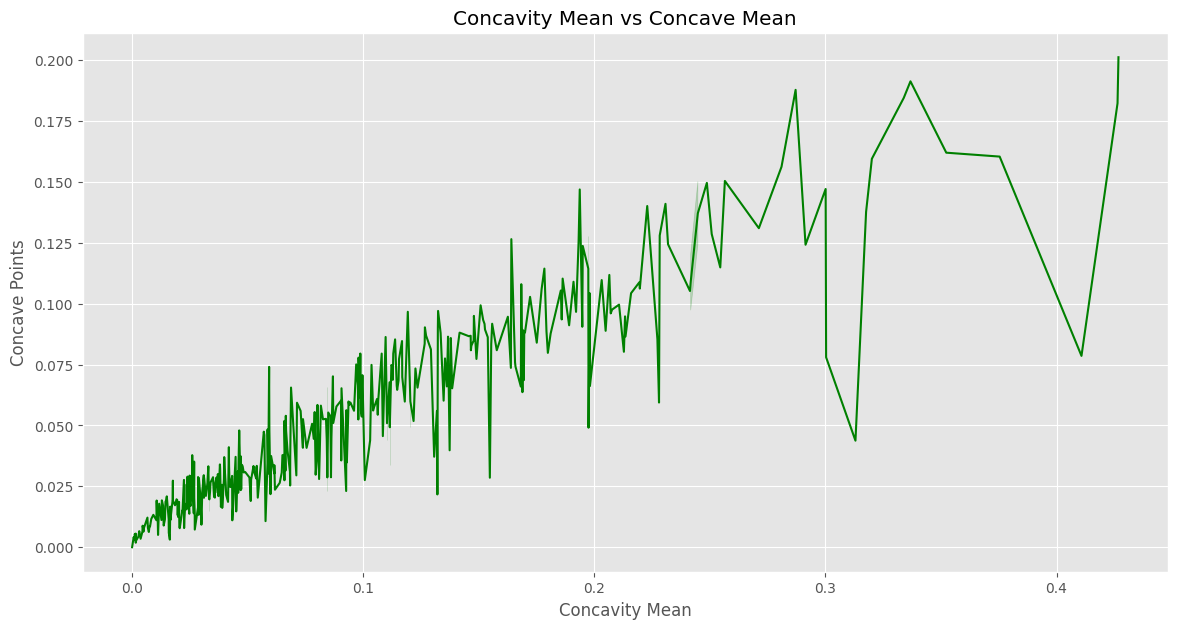

In [17]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "concavity_mean",y = "concave points_mean",data = df[0:400], color='green')
plt.title("Concavity Mean vs Concave Mean")
plt.xlabel("Concavity Mean")
plt.ylabel("Concave Points")
plt.show()

## Building The Model

In [18]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [19]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### DNN Model

In [20]:
i = Input(shape=(None, 455, 31))

x = Dense(16, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)

y = Dense(1, activation='sigmoid')(x)

model_adam = Model(inputs=i, outputs=y)

In [21]:
model_adam.compile(optimizer='adam', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_adam.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 455, 31)]   0         
                                                                 
 dense_1 (Dense)             (None, None, 455, 32)     1024      
                                                                 
 dropout_1 (Dropout)         (None, None, 455, 32)     0         
                                                                 
 dense_2 (Dense)             (None, None, 455, 64)     2112      
                                                                 
 dropout_2 (Dropout)         (None, None, 455, 64)     0         
                                                                 
 dense_3 (Dense)             (None, None, 455, 32)     2080      
                                                                 
 dropout_3 (Dropout)         (None, None, 455, 32)     0     

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

history_adam = model_adam.fit(x=X_train, y=y_train,
                             validation_data=(X_test, y_test),
                             epochs=500,
                             callbacks=[early_stopping])

Epoch 1/500
15/15 [==============================] - 2s 23ms/step - loss: 0.8171 - accuracy: 0.5187 - val_loss: 0.6479 - val_accuracy: 0.6754
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 0.7425 - accuracy: 0.5824 - val_loss: 0.6060 - val_accuracy: 0.7544
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6648 - accuracy: 0.6330 - val_loss: 0.5680 - val_accuracy: 0.8246
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6293 - accuracy: 0.6703 - val_loss: 0.5183 - val_accuracy: 0.8772
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 0.5794 - accuracy: 0.7077 - val_loss: 0.4711 - val_accuracy: 0.9035
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.7319 - val_loss: 0.4195 - val_accuracy: 0.9386
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 0.5462 - accuracy: 0.7429 - val_loss: 0.3657 - val_accuracy: 0.9649
Epoch 8/500


Epoch 52/500
15/15 [==============================] - 0s 6ms/step - loss: 0.0814 - accuracy: 0.9780 - val_loss: 0.0761 - val_accuracy: 0.9737
Epoch 53/500
15/15 [==============================] - 0s 5ms/step - loss: 0.0677 - accuracy: 0.9846 - val_loss: 0.0774 - val_accuracy: 0.9737
Epoch 54/500
15/15 [==============================] - 0s 7ms/step - loss: 0.0723 - accuracy: 0.9758 - val_loss: 0.0777 - val_accuracy: 0.9737
Epoch 55/500
15/15 [==============================] - 0s 6ms/step - loss: 0.0734 - accuracy: 0.9692 - val_loss: 0.0766 - val_accuracy: 0.9737
Epoch 56/500
15/15 [==============================] - 0s 6ms/step - loss: 0.0977 - accuracy: 0.9736 - val_loss: 0.0767 - val_accuracy: 0.9649
Epoch 57/500
15/15 [==============================] - 0s 6ms/step - loss: 0.0871 - accuracy: 0.9802 - val_loss: 0.0780 - val_accuracy: 0.9649
Epoch 58/500
15/15 [==============================] - 0s 6ms/step - loss: 0.0786 - accuracy: 0.9758 - val_loss: 0.0794 - val_accuracy: 0.9649


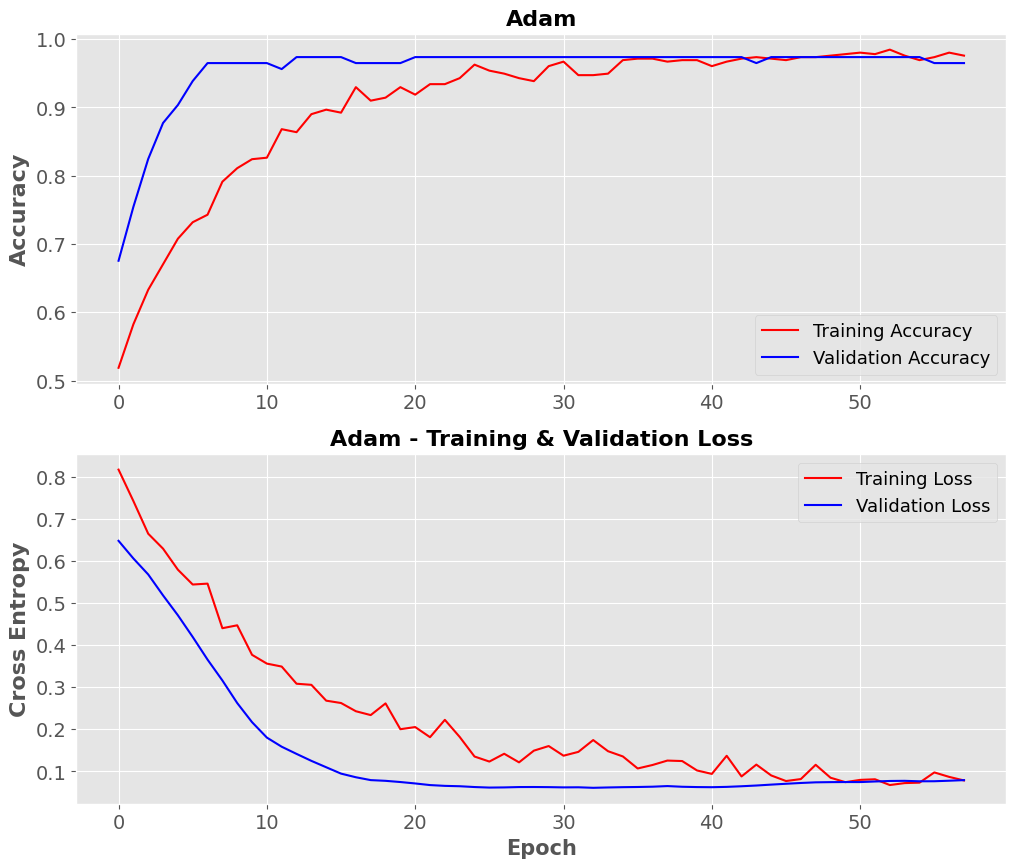

In [23]:
acc = history_adam.history['accuracy']
val_acc = history_adam.history['val_accuracy']

loss = history_adam.history['loss']
val_loss = history_adam.history['val_loss']

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Adam', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Adam - Training & Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

In [24]:
from sklearn.metrics import classification_report

Y_pred = model_adam.predict(X_test)
y_pred = np.round(Y_pred).astype(int)

print(classification_report(y_test, y_pred))

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Normalized confusion matrix


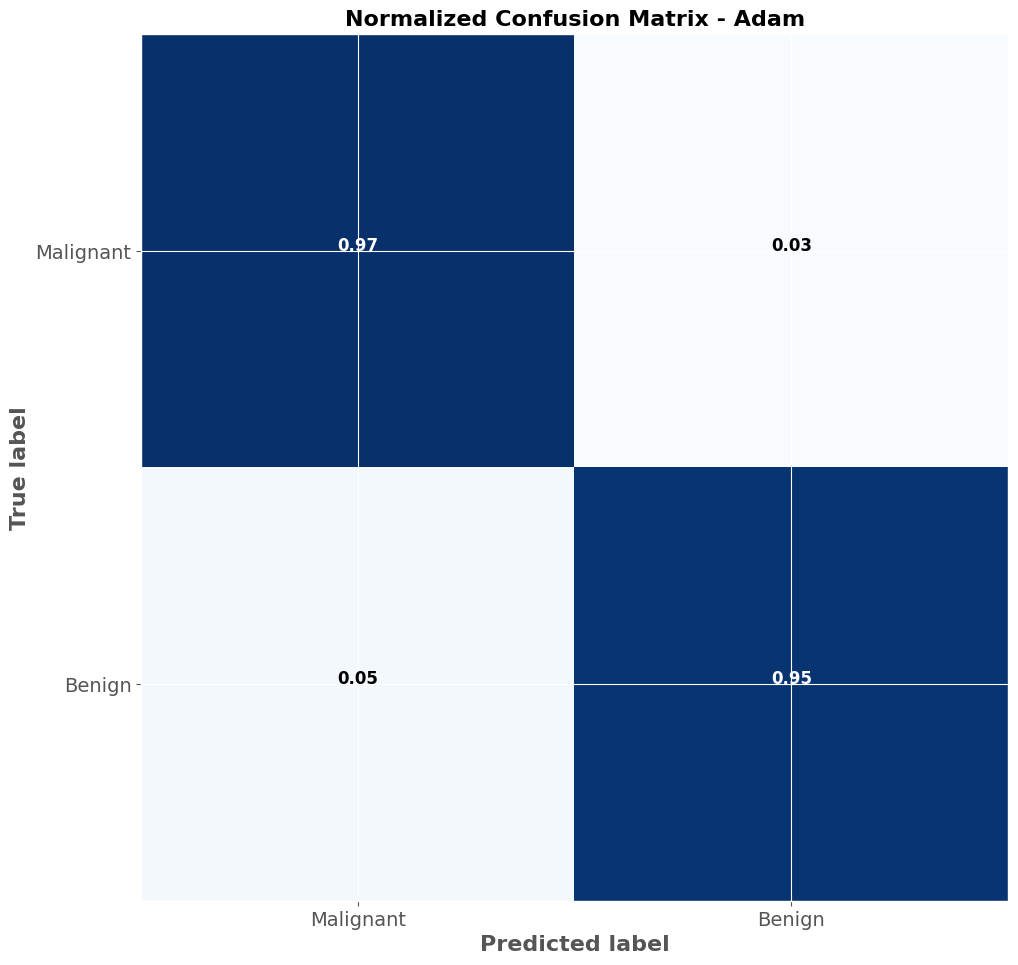

In [25]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Malignant', 'Benign'],normalize=True,
                      title='Normalized Confusion Matrix - Adam')
plt.show()

### ANN Model

In [26]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [28]:
# Initialising the ANN
classifier = Sequential()

In [29]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [31]:
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [32]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [33]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.7500
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.7539
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.8242
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.8730
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.9160
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.9395
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.9414
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.9375
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.9414
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.9395
Epoch 11/150
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9863
Epoch 85/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0554 - accuracy: 0.9863
Epoch 86/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9863
Epoch 87/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9863
Epoch 88/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9844
Epoch 89/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9863
Epoch 90/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9883
Epoch 91/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9863
Epoch 92/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9844
Epoch 93/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9863
Epoch 94/150
6/6 [===============

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 0s/step


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
print("accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

accuracy is 98.24561403508771%


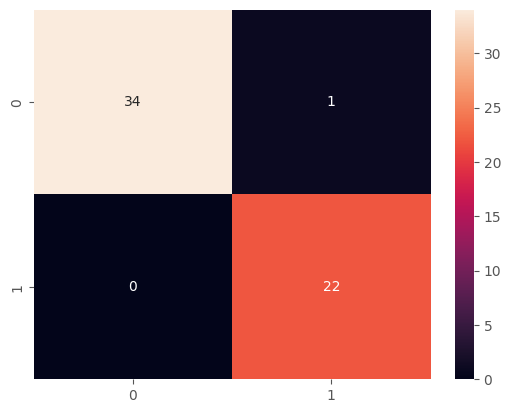

In [38]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')